# Parte 1: Numpy e Geneare un problema da risolvere
NumPy è una libreria open source per il linguaggio di programmazione Python,che aggiunge supporto a grandi matrici e array multidimensionali insieme a una vasta collezione di funzioni matematiche di alto livello per poter operare 
efficientemente su queste strutture dati.

### Importazione Librerie
Nel corso del nostro programma la prima cosa da fare è importare le libreie che vengoo utilizzate. Una buona pratica e di immettere all'inizio queste importazioni anche in maniera iterativa durante la scrittura del codice

In [ ]:
import numpy as np                  # Importazione di NumPy
import random                       # Importazione della libreria per generare numeri casuali
import matplotlib.pyplot as plt     # Libreria utile alla graficazione dei dati

### Generazione del problema
Per prima cosa dobbiamo darci un obbiettivo in questo esempio proveremo a risolvere un problema di regressione lineare ad una variabile. Quindi il nostro obbiettivo sarà quello di trovare il coefficiente m e q di una retta

y = m * x + q


Definiamo il numero di campioni che vogliamo generare per il nostro problema, ossia i dati su cui studieremo il problema

In [ ]:
n_samples = 100

Generiamo un vettore di numeri random questi saranno i nostri valori di X, in questo caso usiamo una costante moltiplicata per un numero randomico tra 0 e 1 per semplicità

In [ ]:
X = 3 * np.random.rand(n_samples, 1)

Adesso generiamo una funzione che definisce il nostro problema, definendo la loro relazione ed aggiungendo un po' di rumore o varaibilità in modo da non averi già su una retta.

bias (5) + coefficiente di peso (1.5) * X(Variabili generate al passo precedente) + rumore randomico

Il risultato sarà un vettore

In [ ]:
y = 5 + 1.5 * X + np.random.randn(n_samples, 1)

Mediante l'utilizzo della libreria matplotlib visualizziamo i nostri dati appena generati

matplotlib è una libreria che serve per la graficazione e tanto altro, per esempi più complessi c'è un ottima pagina con molti esempi

[Esempi di matplotlib](https://matplotlib.org/stable/gallery/index)


Text(0, 0.5, 'F(x)')

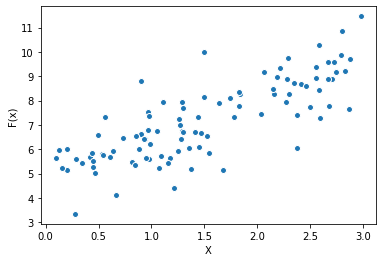

In [ ]:
# Genera il grafico
plt.scatter(X, y, edgecolors='white') 
# aggiungiamo le label
plt.xlabel("X") 
plt.ylabel("F(x)")

# Parte 2: Gradiente Descent

Uno dei metodi classici per risolvere un problema di regressione lineare è quello di usare il gradient descent. 

SPOILER!
Di solito si usa questo come introduzione alle reti neurali, perchè di fatto il funzionamento di un singolo neuro che compone una rete è una regressione linerare.

La cosa migliore nel nostro caso è definire una funzione per implementare il gradient desending

In [ ]:
# Metodo che implementa nella maniera più semplice possibile il Batch Gradient Descending con criterio di uscita il numero di iterazioni
# X_values : Sono i valori che assume la x
# y_values : Sono i valori che arrume la y in funzione della x
# alpha_value : è l iperparamentro che definisce quando siamo veloci a muoverci tra un aggiornamento e l'altro
# numIteration : numero di iterazioni prima di uscire dal metodo
def GradientDescending(X_values, y_values, alpha_value, numIteration):

  # Estraggo il numero dei campioni in mio possesso per poter calcolare il gradiente
  numSamples = X_values.shape[0]

  # Inizializzo theta con valori Casuali
  theta_values = np.random.randn(2,1) # random initialization.

  # Ciclo fino a quando non termino il numero di iterazioni
  for iteration in range(numIteration):

    ### INIZIO LOG

    # Al fine di avere un riscontro durante l'esecuzione aggiungamo una sequenza di 
    # log basate sul calcolo della funzione di costo ad ogni iterazione.
    # Questo non è obbligatorio per eseguire l'algoritmo ma rende più chiaro l'esempio

    # Calcolo lo scarto (Perchè la mia Metrica sarà lo scarto quadratico medio)
    squareError = X_values.dot(theta_values) - y_values

    # Uso come funzione di costo lo scarto quadratico medio
    cost =  np.sum(squareError**2) / numSamples 
        
    # Faccio il print dell'iterazione dell'andamento della funzione costo
    print("Iteration %d | Cost: %f" % (iteration, cost))

    ### FINE LOG

    # Calcolo il gradiente (Perchè il mio ottimizzatore e la discesa del gradiente) per i dettagli matematici fare riferimento a
    # Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-2019
    # Da pagine 119 Gradient Descent
    gradients = 2/numSamples * X_values.T.dot(X_values.dot(theta_values) - y_values)

    # Aggiorno i valori di theta
    theta_values = theta_values - alpha_value * gradients

  # alla fine di tutto ritorno i valori di theta (Che sono poi i miei valori di m e q)
  return theta_values

### Esecuzione

Siamo quasi pronti per eseguire il nostro algoritmo, ma prima dobbiamo fare una piccola operazione suigli input.
Come detto il nostro fine è trovare 2 parametri un coeffiente angolare m e un bias q che compongono il nostro vettore theta. (In questo caso di soli 2 valori)

Quindi il problema è che a livello logico io non posso moltiplicare
X(100,1) * Theta (1,2)

Ricordiamo che il secondo valore di theta è il bias che di fatto è una costante, quindi per rilvere il problema possiamo semplicmente usare una variabile unitaria da moltiplicare per il secondo valore di theta. Questoi permette di operare con matrici senza pero compromettere il nostro ragionamento.

In [ ]:
# Genero la matrice dei campioni con l'aggiunta dellacolonna del bias in testa
X_b = np.c_[np.ones((n_samples, 1)), X] # add x0 = 1 to each instance
X_b.shape

(100, 2)

Adesso è necessario fissare 2 iperparametri, il numero di iterazioni e il lerning rate. 
Numero di iterazione: se troppo basso, probabilmente non riusciremo ad arrivare ad un valore ottimo dei 2 parametri. Se troppo grande probabilmente avremo un tempo di esecuzio alto senza e potrebbe capirare che dopo un certo numero di iterazioni il modello non migliri di tanto.
Learnign rate: parametro molto importante che ci dice quando veloce è il nostro apprendimento tra un iterazione e l'altra


In [ ]:
# Parametri 
n_iterations = 20000
learnign_rate = 0.0003 # learning rate

Siamo finalmente pronti per lanciare il nostro algoritmo

In [ ]:
theta = GradientDescending(X_b, y, learnign_rate, n_iterations)
print(theta)

Per verificare che quanto fatto sia corretto plottiamo i nostri dati, prima pero creaimo una funzione per farlo, in quanto ci tornerá utile in seguito.

In [ ]:
def PlotResult(X, y, y_1):
  plt.scatter(X, y, edgecolors='white')
  # In aggiunta al codice usato per il plot mettiamo la graficazione dei risultati
  plt.plot(X,y_1, color='red', linewidth=2)
  plt.xlabel("X")
  plt.ylabel("F(x)")

Calcoliamo i nostri risultatie e facciamone il plot con la funzione appena creata

In [ ]:
# Caolcolo dei risultati ottenuti con la funzione appena scovata
y_1 = np.dot(X_b,theta)

# Faccio il plot
PlotResult(X, y, y_1)

## Alternative

Nel seguito riportamo anche 2 alternative al Batch Gradient Descending come lo Stocastic e il Mini Batch.

### Stocastic Gradient Descending


In [ ]:
# Metodo che implementa nella maniera più semplice possibile il gradient descending
def StocasticGradientDescending(X_values, y_values, alpha_value, iteration):

  # Inizializzo theta con valori Casuali
  theta_values = np.random.randn(2,1) # random initialization.

  # per comodita mi prendo un nuemro di campioni
  numSamples = X_values.shape[0]

  # Ciclo fino a quando non termino il numero di iterazioni (Il mio )
  for iteration in range(iteration):

    ### INIZIO LOG

    # Al fine di avere un riscontro durante l'esecuzione aggiungamo una sequenza di 
    # log basate sul calcolo della funzione di costo ad ogni iterazione.
    # Questo non è obbligatorio per eseguire l'algoritmo ma rende più chiaro l'esempio

    # Calcolo lo scarto (Perchè la mia Metrica sarà lo scarto quadratico medio)
    squareError = X_values.dot(theta_values) - y_values

    # Uso come funzione di costo lo scarto quadratico medio
    cost =  np.sum(squareError**2) / numSamples 
        
    # Faccio il print dell'iterazione dell'andamento della funzione costo
    print("Iteration %d | Cost: %f" % (iteration, cost))

    ### FINE LOG

    # Per ogni valore del mio dataset
    for i in range(numSamples):

      # Genero un indice che usero di epoca in epoca i set di dati a caso
      # questo mi permette di abbassare la possibilità di essere influenzato dall'ordine dei dati
      random_index = np.random.randint(numSamples)

      # Estraggo campioni a caso
      xi = X_values[random_index:random_index+1]
      yi = y_values[random_index:random_index+1]
      
      # Calcolo il gradiente con i valori estratti
      gradients = 2 * xi.T.dot(xi.dot(theta_values) - yi)

      # aggirnoo theta
      theta_values = theta_values - alpha_value * gradients

  return theta_values

Ridefiniamo i parametri in quanto ad esempio Per lo stocastic il numero delle epoche deve essere molto minore, i quanto già internamente vengono eseguite numIterazioni per ogni sample. Inoltre anche il leargin rate puó essere aumentato in quando ad ogni iterazione faremo passi piú picoli

In [ ]:
n_iterations_stocastic = 50
learnign_rate_stocastic = 0.001 # learning rate

In [ ]:
# Calcolo theta
theta_stocastic = StocasticGradientDescending(X_b, y, learnign_rate_stocastic, n_iterations_stocastic)
print(theta_stocastic)

Iteration 0 | Cost: 31.619543
Iteration 1 | Cost: 10.295196
Iteration 2 | Cost: 5.349643
Iteration 3 | Cost: 4.364265
Iteration 4 | Cost: 3.984055
Iteration 5 | Cost: 3.824638
Iteration 6 | Cost: 3.529498
Iteration 7 | Cost: 3.383314
Iteration 8 | Cost: 3.175153
Iteration 9 | Cost: 3.029801
Iteration 10 | Cost: 2.873997
Iteration 11 | Cost: 2.765699
Iteration 12 | Cost: 2.657628
Iteration 13 | Cost: 2.489881
Iteration 14 | Cost: 2.375916
Iteration 15 | Cost: 2.275721
Iteration 16 | Cost: 2.169114
Iteration 17 | Cost: 2.056971
Iteration 18 | Cost: 1.978037
Iteration 19 | Cost: 1.914784
Iteration 20 | Cost: 1.828594
Iteration 21 | Cost: 1.772498
Iteration 22 | Cost: 1.706780
Iteration 23 | Cost: 1.648389
Iteration 24 | Cost: 1.590091
Iteration 25 | Cost: 1.548899
Iteration 26 | Cost: 1.507940
Iteration 27 | Cost: 1.472800
Iteration 28 | Cost: 1.440132
Iteration 29 | Cost: 1.408014
Iteration 30 | Cost: 1.381651
Iteration 31 | Cost: 1.351253
Iteration 32 | Cost: 1.318550
Iteration 33 | Cos

Calcoliamo i nostri risultatie e facciamone il plot con la funzione appena creata

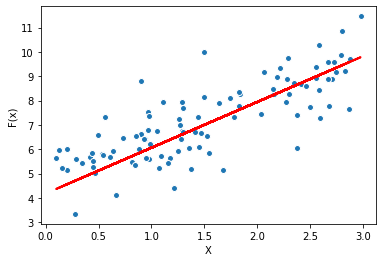

In [ ]:
# Caolcolo dei risultati ottenuti con la funzione appena scovata
y_2 = np.dot(X_b,theta_stocastic)

# Faccio il plot
PlotResult(X, y, y_2)

### Mini Batch Gradient Descending

In [ ]:
# Metodo che implementa nella maniera più semplice possibile il gradient descending
def MiniBatchGradientDescending(X_values, y_values, alpha_value, iteration, batch_size):

  # Inizializzo theta con valori Casuali
  theta_values = np.random.randn(2,1) # random initialization.

  # per comodita mi prendo un nuemro di campioni
  numSamples = X_values.shape[0]

  # Ciclo fino a quando non termino il numero di iterazioni (Il mio )
  for iteration in range(iteration):
    
    # Devo creare i miei bacth 

    # unisco input e output in un unica matrice
    data = np.hstack((X_values, y_values))

    # randomizzo i dati: imporabtissimo per non allenare sempre sugli stessi bacth, ma sopratutto per randomizzare l'estazione dei valori
    np.random.shuffle(data)

    # Calcolo il numero di bacth che devo fare rispetto alla bacth size
    # Faccio la divisione intera + 1
    n_minibatches = data.shape[0] // batch_size

    # Per comodita faccio un archivio dei bacth da poi scorrere
    mini_batches = []

    # Genero i bacth in 
    for i in range(n_minibatches):
      mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
      X_mini = mini_batch[:, :-1]
      Y_mini = mini_batch[:, -1].reshape((-1, 1))
      mini_batches.append((X_mini, Y_mini))

    if data.shape[0] % batch_size != 0:
      mini_batch = data[i * batch_size:data.shape[0]]
      X_mini = mini_batch[:, :-1]
      Y_mini = mini_batch[:, -1].reshape((-1, 1))
      mini_batches.append((X_mini, Y_mini))

    k = 1

    # Adesso scorro tutti i bacth
    for mini_batch in mini_batches:

      ### INIZIO LOG

      # Al fine di avere un riscontro durante l'esecuzione aggiungamo una sequenza di 
      # log basate sul calcolo della funzione di costo ad ogni iterazione.
      # Questo non è obbligatorio per eseguire l'algoritmo ma rende più chiaro l'esempio

      # Calcolo lo scarto (Perchè la mia Metrica sarà lo scarto quadratico medio)
      squareError = X_values.dot(theta_values) - y_values

      # Uso come funzione di costo lo scarto quadratico medio
      cost =  np.sum(squareError**2) / numSamples 
          
      # Faccio il print dell'iterazione dell'andamento della funzione costo
      print("Iteration %d | Batch %d/%d | Cost: %f" % (iteration, k, n_minibatches,cost))

      k = k + 1

      ### FINE LOG

      # estraggo i dati dal mio vettore di bacth
      X_mini, y_mini = mini_batch

      # Calcolo il gradiente con i valori estratti
      gradients = 2 * X_mini.T.dot(X_mini.dot(theta_values) - y_mini)

      # aggirnoo theta
      theta_values = theta_values - alpha_value * gradients

  return theta_values

In [ ]:
n_iterations_mini = 50
learnign_rate_mini = 0.005 # learning rate
bacth_size = 5

In [ ]:
# Calcolo theta
theta_mini = MiniBatchGradientDescending(X_b, y, learnign_rate_mini, n_iterations_mini, bacth_size)
print(theta_mini)

Iteration 0 | Batch 1/20 | Cost: 79.664620
Iteration 0 | Batch 2/20 | Cost: 42.331871
Iteration 0 | Batch 3/20 | Cost: 30.546694
Iteration 0 | Batch 4/20 | Cost: 21.719006
Iteration 0 | Batch 5/20 | Cost: 16.950836
Iteration 0 | Batch 6/20 | Cost: 13.460531
Iteration 0 | Batch 7/20 | Cost: 10.945801
Iteration 0 | Batch 8/20 | Cost: 9.591573
Iteration 0 | Batch 9/20 | Cost: 8.152613
Iteration 0 | Batch 10/20 | Cost: 7.797369
Iteration 0 | Batch 11/20 | Cost: 7.237776
Iteration 0 | Batch 12/20 | Cost: 7.181314
Iteration 0 | Batch 13/20 | Cost: 7.015324
Iteration 0 | Batch 14/20 | Cost: 6.955634
Iteration 0 | Batch 15/20 | Cost: 6.475136
Iteration 0 | Batch 16/20 | Cost: 6.318356
Iteration 0 | Batch 17/20 | Cost: 5.978369
Iteration 0 | Batch 18/20 | Cost: 5.876291
Iteration 0 | Batch 19/20 | Cost: 5.882242
Iteration 0 | Batch 20/20 | Cost: 5.836895
Iteration 1 | Batch 1/20 | Cost: 5.651273
Iteration 1 | Batch 2/20 | Cost: 5.623304
Iteration 1 | Batch 3/20 | Cost: 5.513501
Iteration 1 | Ba

Calcoliamo i nostri risultatie e facciamone il plot con la funzione appena creata

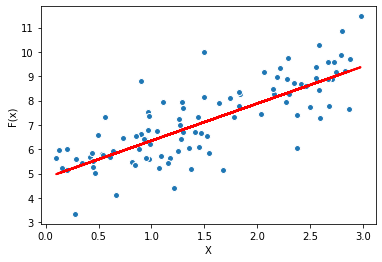

In [ ]:
# Caolcolo dei risultati ottenuti con la funzione appena scovata
y_3 = np.dot(X_b,theta_mini)

# Faccio il plot
PlotResult(X, y, y_3)

# Parte 3: Studiare il Learning Rate
Il Learnign Rate è uno degl iperparametri più complessi da prevedere, per questo ci sono infatti molte metologie per il calcolo usando altri fattori o per trovarne il valore migliore tramite i dati di partenza.

Qui nel seguivo viene proposta una funzione di generazione dei dati alternativa a quella usata precedentemente, per poter studiare come in base ai dati il learning rate cambia.


### Generazione Dati Alternativa
Questa funzione genera numPoints valori calcolati su valori incrementali di x da 0 a numPoints che possienono una vairanza e bias specificati
Il vettore delle X per poter contare anche il bias viene fatto di 2 colonne per poter eseguire i calcoli.

Provare a:


1. Graficare i dati;
2. Eseguire i vari metodi di GD
3. Graficare i risultati
4. Confrontarli tra di loro i risultati
5. Confrontarli gli iperparametri tra questi dati e quelli calcolati nell'esempio



In [ ]:
def GenData(numPoints, bias, variance):
  x_i = np.zeros(shape=(numPoints, 2))
  y_i = np.zeros(shape=(numPoints, 1))
  # ciclo per creare un numero di campioni come definito dal parametro
  for i in range(0, numPoints):
    # bias feature
    x_i[i][0] = 1
    x_i[i][1] = i
    # our target variable
    y_i[i] = (i + bias) + random.uniform(0, 1) * variance
  return x_i, y_i

Generazioe Dati con bias di 25 e variazione di 10

In [ ]:
n_samples = 100

X_b_alterantive, y_alternative = GenData(n_samples, 25, 10)